In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)
X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)
X_subset = X_test2
y_subset = y_test2

In [2]:
from sklearn.tree import DecisionTreeClassifier
treeD = DecisionTreeClassifier(random_state = 0)
treeD.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=0)

In [3]:
print("accuracy on training set: %f" % treeD.score(X_train2, y_train2))
print("accuracy on test set: %f" % treeD.score(X_subset, y_subset))

accuracy on training set: 1.000000
accuracy on test set: 1.000000


In [6]:
importance = treeD.feature_importances_
features_val = []
for i, v in enumerate(importance):
    features_val.append([v, X_train2.columns[i]])
features_val.sort(reverse=True)
features = np.array(features_val)
features = features[:5]
features = features.tolist()
features

[['0.6251435175471661', 'odor_n'],
 ['0.1691757144252228', 'stalk-root_c'],
 ['0.08658915843078754', 'stalk-root_r'],
 ['0.03437506344670402', 'spore-print-color_r'],
 ['0.023503682936672883', 'odor_l']]

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
svc_Val = SVC(kernel='rbf', C=1, random_state=0)
gamma = np.logspace(-4, 1, 6)
train_scores, test_scores = validation_curve(svc_Val, X_subset, y_subset, param_name='gamma',
                param_range=gamma, scoring='accuracy')
scores = (train_scores.mean(axis = 1), test_scores.mean(axis=1))
scores

(array([0.83370474, 0.93943926, 0.99101417, 1.        , 1.        ,
        1.        ]),
 array([0.83160092, 0.93747958, 0.9901502 , 1.        , 0.99852459,
        0.52240229]))

In [10]:
import matplotlib.pyplot as plt
for index, num in enumerate(np.logspace(-4,1,6)):
    print(num)

0.0001
0.001
0.01
0.1
1.0
10.0


In [16]:
print(X_subset.shape)
print(y_subset.shape)

(2031, 117)
(2031,)


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

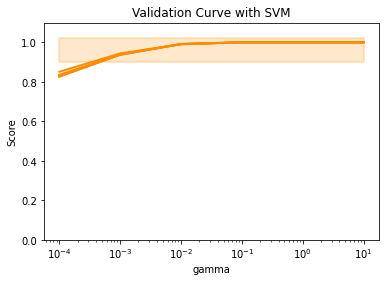

In [18]:
plt.title("Validation Curve with SVM")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(gamma, train_scores, label="Training score", color="darkorange", lw=lw)
plt.fill_between(gamma,train_scores.mean() - train_scores.std(),train_scores.mean() + train_scores.std(),
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(gamma, test_scores.mean(), label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(gamma, test_scores.mean() - test_scores.std(),
    test_scores.mean() + test_scores.std(),
    alpha=0.2,
    color="navy",
    lw=lw)
plt.legend(loc="best")
plt.show()